In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
import numpy as np

fileloc = r"C:\Users\631033\Documents"
filename1 =  r"project_data.xlsx"
df = pd.read_excel(os.path.join(fileloc,filename1))

In [2]:
df.head()

,Date,Present,Avg Cloudcover,Avg Dew,Avg Humidity,Avg Temp,Avg Visibility,Avg Windgust,Avg Windspeed,SLP Change
0,2023-04-09,0,14.800000,26.083333,50.457917,46.891667,9.900000,6.841667,2.9500,-0.200000
1,2023-04-08,1,47.925000,25.225000,43.347500,47.475000,9.900000,10.275000,5.1125,2.641667
2,2023-04-06,0,68.675000,58.237500,61.943750,72.916667,9.812500,16.266667,7.0750,2.758333
3,2023-04-05,1,46.987500,59.137500,63.015000,73.920833,9.845833,18.175000,8.7000,2.158333
4,2023-04-04,1,10.491667,49.437500,53.450833,67.883333,9.900000,12.620833,6.8375,-2.370833


In [3]:
features = df.drop(columns=['Date','Present'])

In [4]:
label = df.Present

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size = 0.25, random_state = 0, stratify=label)
    
sc=MinMaxScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled=pd.DataFrame(sc.transform(X_test))

## Visualizations

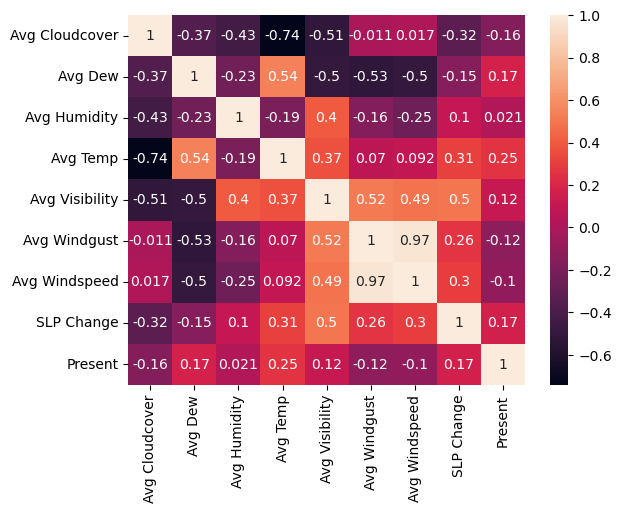

In [6]:
d = preprocessing.normalize(features)
scaled_df = pd.DataFrame(d, columns=features.columns)
scaled_df['Present'] = df['Present']
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()
# temp, dew, slp change, cloudcover

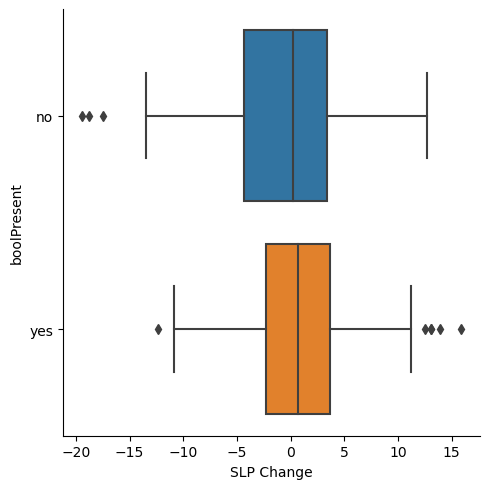

In [8]:
df['boolPresent'] = df.Present.replace({1:"yes", 0: "no"})
sns.catplot(x='SLP Change', y = 'boolPresent', data=df, kind="box")
plt.show()

## Statistical testing

t-test between days with no contrails and days with contrails. Normalized prior.

In [9]:
false_df = scaled_df[scaled_df.Present==0]
false_df = false_df.rename({"SLP Change":"SLP", "Avg Cloudcover":"Cloudcover", "Avg Dew":"Dew", "Avg Humidity":"Humid", 
                            "Avg Temp":"Temp", "Avg Visibility":"Vis", "Avg Windgust":"Gust", "Avg Windspeed":"Windspeed"}, axis=1)
false_df.head()

,Cloudcover,Dew,Humid,Temp,Vis,Gust,Windspeed,SLP,Present
0,0.194371,0.342557,0.662672,0.615836,0.130018,0.089853,0.038743,-0.002627,0
2,0.516481,0.437984,0.465857,0.548381,0.073796,0.122336,0.053209,0.020744,0
7,0.553351,0.371680,0.492703,0.456351,0.069899,0.260355,0.118205,-0.134168,0
17,0.032281,0.229127,0.684761,0.645342,0.170446,0.126687,0.071091,0.104592,0
22,0.167205,0.192897,0.544197,0.572041,0.143630,0.457487,0.273960,0.080459,0


In [10]:
true_df= scaled_df[scaled_df.Present==1]
true_df = true_df.rename({"SLP Change":"SLP", "Avg Cloudcover":"Cloudcover", "Avg Dew":"Dew", "Avg Humidity":"Humid", 
                          "Avg Temp":"Temp", "Avg Visibility":"Vis", "Avg Windgust":"Gust", "Avg Windspeed":"Windspeed"}, axis=1)
true_df.head()

,Cloudcover,Dew,Humid,Temp,Vis,Gust,Windspeed,SLP,Present
1,0.560816,0.295182,0.507251,0.555551,0.115849,0.120238,0.059826,0.030913,1
3,0.375625,0.472754,0.503751,0.590934,0.078709,0.145294,0.069549,0.017254,1
4,0.103233,0.486439,0.525928,0.667936,0.097411,0.124182,0.067277,-0.023328,1
5,0.292088,0.399473,0.627415,0.559982,0.104142,0.172299,0.082489,0.023230,1
6,0.486670,0.313256,0.502739,0.542974,0.109118,0.256906,0.143057,0.138143,1


In [11]:
SLP_stat = stats.ttest_1samp(a = false_df.SLP, popmean = true_df.SLP.mean() )
Cloudcover_stat = stats.ttest_1samp(a = false_df.Cloudcover, popmean = true_df.Cloudcover.mean() )
Dew_stat = stats.ttest_1samp(a = false_df.Dew, popmean = true_df.Dew.mean() )
Humid_stat = stats.ttest_1samp(a = false_df.Humid, popmean = true_df.Humid.mean() ) # not significant
Temp_stat = stats.ttest_1samp(a = false_df.Temp, popmean = true_df.Temp.mean() )
Vis_stat = stats.ttest_1samp(a = false_df.Vis, popmean = true_df.Vis.mean() ) # not significant
Gust_stat = stats.ttest_1samp(a = false_df.Gust, popmean = true_df.Gust.mean() ) # not significant
Windspeed_stat = stats.ttest_1samp(a = false_df.Windspeed, popmean = true_df.Windspeed.mean() ) # not significant

In [12]:
p_vals = pd.DataFrame({
    'Variable': ['SLP', 'Cloudcover','dew','humidity','temp','visibility','gust','windspeed'],
    'P-value': [SLP_stat.pvalue, Cloudcover_stat.pvalue, Dew_stat.pvalue, Humid_stat.pvalue, 
              Temp_stat.pvalue, Vis_stat.pvalue,Gust_stat.pvalue, Windspeed_stat.pvalue]})
p_vals.sort_values('P-value')

,Variable,P-value
4,temp,0.000090
2,dew,0.003086
0,SLP,0.003239
1,Cloudcover,0.014784
6,gust,0.056766
5,visibility,0.065505
7,windspeed,0.107496
3,humidity,0.694765


Wilcoxon rank-sum statistic - used because it does not need normalization

In [13]:
false_df = df[df.Present==0].drop('Date', axis =1)
false_df = false_df.rename({"SLP Change":"SLP", "Avg Cloudcover":"Cloudcover", "Avg Dew":"Dew", "Avg Humidity":"Humid", 
                            "Avg Temp":"Temp", "Avg Visibility":"Vis", "Avg Windgust":"Gust", "Avg Windspeed":"Windspeed"}, axis=1)
false_df.head()

,Present,Cloudcover,Dew,Humid,Temp,Vis,Gust,Windspeed,SLP,boolPresent
0,0,14.800000,26.083333,50.457917,46.891667,9.900000,6.841667,2.950000,-0.200000,no
2,0,68.675000,58.237500,61.943750,72.916667,9.812500,16.266667,7.075000,2.758333,no
7,0,77.416667,52.000000,68.931667,63.845833,9.779167,36.425000,16.537500,-18.770833,no
17,0,1.875000,13.308333,39.772917,37.483333,9.900000,7.358333,4.129167,6.075000,no
22,0,11.525000,13.295833,37.510000,39.429167,9.900000,31.533333,18.883333,5.545833,no


In [14]:
true_df= df[df.Present==1].drop('Date', axis=1)
true_df = true_df.rename({"SLP Change":"SLP", "Avg Cloudcover":"Cloudcover", "Avg Dew":"Dew", "Avg Humidity":"Humid", 
                          "Avg Temp":"Temp", "Avg Visibility":"Vis", "Avg Windgust":"Gust", "Avg Windspeed":"Windspeed"}, axis=1)
true_df.head()

,Present,Cloudcover,Dew,Humid,Temp,Vis,Gust,Windspeed,SLP,boolPresent
1,1,47.925000,25.225000,43.347500,47.475000,9.900000,10.275000,5.112500,2.641667,yes
3,1,46.987500,59.137500,63.015000,73.920833,9.845833,18.175000,8.700000,2.158333,yes
4,1,10.491667,49.437500,53.450833,67.883333,9.900000,12.620833,6.837500,-2.370833,yes
5,1,27.766667,37.975000,59.643750,53.233333,9.900000,16.379167,7.841667,2.208333,yes
6,1,44.154167,28.420833,45.612083,49.262500,9.900000,23.308333,12.979167,12.533333,yes


In [15]:
SLP_stat = stats.ranksums(x = false_df.SLP, y = true_df.SLP) 
Cloudcover_stat = stats.ranksums(x = false_df.Cloudcover, y = true_df.Cloudcover )
Dew_stat = stats.ranksums(x = false_df.Dew, y = true_df.Dew) 
Humid_stat = stats.ranksums(x = false_df.Humid, y = true_df.Humid) 
Temp_stat = stats.ranksums(x = false_df.Temp, y = true_df.Temp)
Vis_stat = stats.ranksums(x = false_df.Vis, y = true_df.Vis) 
Gust_stat = stats.ranksums(x = false_df.Gust, y = true_df.Gust) 
Windspeed_stat = stats.ranksums(x = false_df.Windspeed, y = true_df.Windspeed)

In [16]:
p_vals = pd.DataFrame({
    'Variable': ['SLP', 'Cloudcover','dew','humidity','temp','visibility','gust','windspeed'],
    'P-value': [SLP_stat.pvalue, Cloudcover_stat.pvalue, Dew_stat.pvalue, Humid_stat.pvalue, 
              Temp_stat.pvalue, Vis_stat.pvalue,Gust_stat.pvalue, Windspeed_stat.pvalue]})
p_vals.sort_values('P-value')

,Variable,P-value
1,Cloudcover,0.009023
6,gust,0.016002
5,visibility,0.028990
7,windspeed,0.053647
4,temp,0.098961
0,SLP,0.143358
3,humidity,0.271775
2,dew,0.499202


## Build machine learning models

In [17]:
# pip install xgboost
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc

In [18]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
LR_pred = LR.predict(X_test_scaled)

Acc_LR = round(accuracy_score(LR_pred, y_test), 4)
xgprec_LR, xgrec_LR, xgf_LR, support_LR = score(y_test, LR_pred)
precision_LR, recall_LR, f1_LR = round(xgprec_LR[0], 4), round(xgrec_LR[0],4), round(xgf_LR[0],4)
scores_DT = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [Acc_LR, precision_LR, recall_LR, f1_LR]})
scores_DT

,Metric,Score
0,Accuracy,0.7609
1,Precision,0.9091
2,Recall,0.5000
3,F1,0.6452


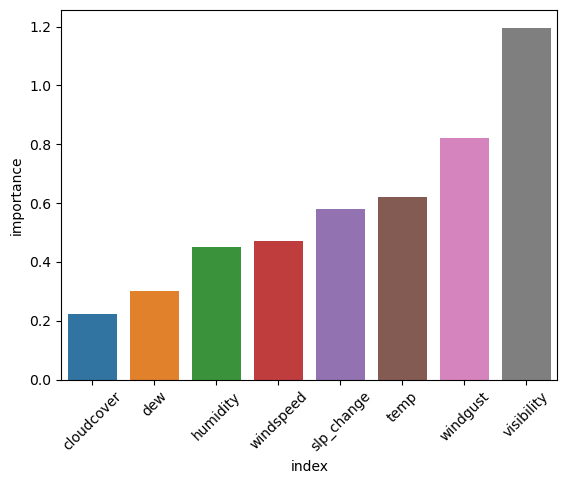

In [19]:
importance = pd.DataFrame(np.absolute(LR.coef_[0]))
importance.rename({0:'importance'}, axis=1, inplace=True)
importance.rename({0:'cloudcover',1:'dew',2:'humidity',3:'temp',4:'visibility',5:'windgust',6:'windspeed',7:'slp_change'}, inplace=True)
importance.sort_values('importance', inplace=True)
importance.reset_index(inplace=True)
sns.barplot(x='index',y='importance',data=importance)
plt.xticks(rotation=45)
plt.show()

In [20]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
RF_pred = RF.predict(X_test_scaled)

Acc_RF = round(accuracy_score(RF_pred, y_test), 4)
xgprec_RF, xgrec_RF, xgf_RF, support_RF = score(y_test, RF_pred)
precision_RF, recall_RF, f1_RF = round(xgprec_RF[0], 4), round(xgrec_RF[0],4), round(xgf_RF[0],4)
scores_RF = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [Acc_RF, precision_RF, recall_RF, f1_RF]})
scores_RF

,Metric,Score
0,Accuracy,0.5870
1,Precision,0.5385
2,Recall,0.3500
3,F1,0.4242


<AxesSubplot:title={'center':'Variable Importance for Random Forest'}>

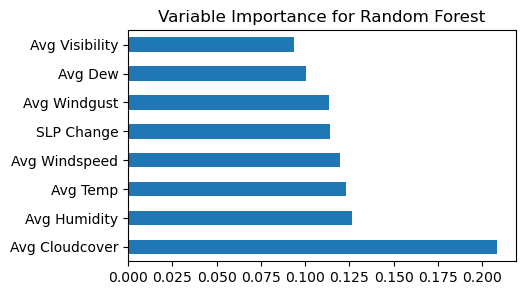

In [21]:
feat_importances_RF = pd.Series(RF.feature_importances_, index=features.columns)
feat_importances_RF.nlargest(8).plot(kind='barh', title = 'Variable Importance for Random Forest', figsize=[5,3])

In [22]:
XGB = XGBClassifier()
XGB.fit(X_train_scaled, y_train)
XGB_pred = XGB.predict(X_test_scaled)

Acc_XGB = round(accuracy_score(XGB_pred, y_test),4)
xgprec_XGB, xgrec_XGB, xgf_XGB, support_XGB = score(y_test, XGB_pred)
precision_XGB, recall_XGB, f1_XGB = round(xgprec_XGB[0], 4), round(xgrec_XGB[0],4), round(xgf_XGB[0],4)
scores_XGB = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [Acc_XGB, precision_XGB, recall_XGB, f1_XGB]})
scores_XGB

,Metric,Score
0,Accuracy,0.5652
1,Precision,0.5000
2,Recall,0.4500
3,F1,0.4737


<AxesSubplot:title={'center':'Variable Importance for Gradient Boosted Tree'}>

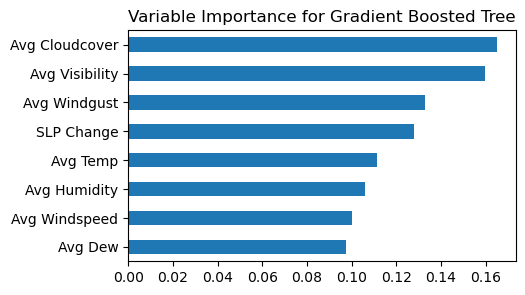

In [23]:
feat_importances_XGB = pd.Series(XGB.feature_importances_, index=features.columns).sort_values()
feat_importances_XGB.plot(kind='barh', title = 'Variable Importance for Gradient Boosted Tree', figsize=[5,3])

Cloudcover, Visibility, Temperature most common

# CUT

In [ ]:
scaled_df_rename = scaled_df.rename({"SLP Change":"SLP", "Avg Cloudcover":"Cloudcover", "Avg Dew":"Dew", "Avg Humidity":"Humid", "Avg Temp":"Temp", "Avg Visibility":"Vis", "Avg Windgust":"Gust", "Avg Windspeed":"Windspeed"}, axis=1)

SLP_stat = stats.ttest_1samp(a = false_df.SLP, popmean = scaled_df_rename.SLP.mean() )
Cloudcover_stat = stats.ttest_1samp(a = false_df.Cloudcover, popmean = scaled_df_rename.Cloudcover.mean() )
Dew_stat = stats.ttest_1samp(a = false_df.Dew, popmean = scaled_df_rename.Dew.mean() )
Humid_stat = stats.ttest_1samp(a = false_df.Humid, popmean = scaled_df_rename.Humid.mean() ) # not significant
Temp_stat = stats.ttest_1samp(a = false_df.Temp, popmean = scaled_df_rename.Temp.mean() )
Vis_stat = stats.ttest_1samp(a = false_df.Vis, popmean = scaled_df_rename.Vis.mean() ) # not significant
Gust_stat = stats.ttest_1samp(a = false_df.Gust, popmean = scaled_df_rename.Gust.mean() ) # not significant
Windspeed_stat = stats.ttest_1samp(a = false_df.Windspeed, popmean = scaled_df_rename.Windspeed.mean() ) # not significant